In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)

# Questão 1

## O Conjunto de Dados

Inicialmente será realizado o preenchimento dos dados ausentes da coluna "True_class" com os dados da coluna "Pred_class".

In [2]:
df = pd.read_excel('../data/teste_smarkio_lbs.xls')

In [3]:
df.head()

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,NaN


In [4]:
df.True_class.fillna(df.Pred_class, inplace=True)

df.head()

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,2.0


Com os dados ajustados, foi realizada uma análise do conjunto de dados como um todo, levantando suas principais informações, como quantidade de linhas e colunas e tipo de dados por coluna.

In [5]:
print("Dimensões do dataframe: ")
print("Linhas: ", df.shape[0])
print("Colunas: ", df.shape[1])

Dimensões do dataframe: 
Linhas:  643
Colunas:  4


In [6]:
pd.concat([pd.DataFrame([[cols, str(df[cols].dtype)]], columns=['Colunas', 'Tipo de Informação']) for cols in df.columns], ignore_index=True)

,Colunas,Tipo de Informação
0,Pred_class,int64
1,probabilidade,float64
2,status,object
3,True_class,float64


## Análises com 1 variável

### Variável: Pred_class

Em seguida, foi realizada uma análise das colunas individualmente. 

A primeira coluna analisada será a coluna "Pred_class". Os dados desta coluna são dados qualitativos, ou seja, dados que representam uma característica do objeto observado, nesse caso em específico os dados indicam a classe que foi identificada pelo modelo. 

Para esses dados, foi levantado a quantidade de classes identificadas pelo modelo e quais foram essas clases.

In [7]:
print('Quantidade de classes: ', df.Pred_class.nunique())

print('\n')

print('Classes Identificadas: ', df.Pred_class.unique())

Quantidade de classes:  80


Classes Identificadas:  [  2   3   4  11  17  22  24  26  32  33  48  50  52  55  60  62  64  74
  77  82  85  87  92  93  96  98  99 102 103 104 106 107 108 109 110 116
 118  25  28  29  40  49  68 111  19  30  39  58  65  81  31  43  69  90
  12  15  21  54  59  63  70  76  78  79  86  88 112 115  46  56  73  94
  95 100 105  66 114 113  36  84]


O próximo passo foi elaborar uma Tabela de Frequência com os dados dessa coluna.

In [8]:
n = df.shape[0]

pd.concat([pd.DataFrame([[classe, (df.Pred_class == classe).sum(), ((df.Pred_class == classe).sum() / n) * 100]], columns=['Classe', 'Frequência Absoluta', 'Frequência Relativa (%)']) for classe in df.Pred_class.unique()], ignore_index=True).sort_values('Frequência Absoluta', ascending=False, ignore_index=True)

,Classe,Frequência Absoluta,Frequência Relativa (%)
0,3,63,9.797823
1,2,61,9.486781
2,74,59,9.175739
3,77,31,4.821151
4,60,31,4.821151
5,4,23,3.576983
6,96,21,3.265941
7,52,20,3.110420
8,55,17,2.643857
9,110,16,2.488336


Podemos notar uma alta ocorrência das classes 3, 2 e 74 em relação as outras.

Em seguida, foi levantado algumas características estatísticas da "Frequência Absoluta", como média, desvio padrão, minimo, quartis 25%, 50% (mediana) e 75%, e máximo.

In [9]:
pd.concat([pd.DataFrame([[classe, (df.Pred_class == classe).sum(), ((df.Pred_class == classe).sum() / n) * 100]], columns=['Classe', 'Frequência Absoluta', 'Frequência Relativa (%)']) for classe in df.Pred_class.unique()], ignore_index=True).sort_values('Frequência Absoluta', ascending=False, ignore_index=True).describe().drop(['Classe', 'Frequência Relativa (%)'], axis = 1)

,Frequência Absoluta
count,80.00000
mean,8.03750
std,12.33339
min,1.00000
25%,2.00000
50%,4.00000
75%,7.25000
max,63.00000


É interessante notar a diferença da média (aproximadamente 8) pra mediana (4). Isso indica que a distribuição dos dados está deslocada para a direita, isto é, algumas poucas classes contém a maior quantidade de ocorrências.

### Variável: probabilidade

Diferente do caso anterior, a coluna "probabilidade" apresenta dados quantitativos, isto é, dados que possuem significado numérico.

Para esses dados, foi levantado as suas características estatísticas, como média, desvio padrão, minimo, quartis 25%, 50% (mediana) e 75%, e máximo.

In [10]:
df.drop(['Pred_class', 'True_class'], axis = 1).describe()

,probabilidade
count,643.000000
mean,0.622436
std,0.266811
min,0.043858
25%,0.408017
50%,0.616809
75%,0.870083
max,1.000000


No gráfico abaixo, é apresentado um diagrama de caixa da distribuição desses dados. 

O quadrado central do diagrama é formado pelos quartis 25% e 75%. A linha verde ao centro indica a mediana (quartil 50%) dos dados. E as linhas pretas fora da caixa indicam os valores máximo e mínimo dos dados.

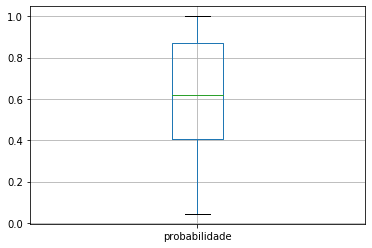

In [11]:
df.drop(['Pred_class', 'True_class'], axis = 1).boxplot()

Com a média e a mediana, podemos perceber uma simetria nas probabilidades em aproximadamente 62%. Outra informação relevante que podemos tirar dessas características, ao analisar o quartil 25%, é que para 75% das amostras o modelo possuia pelo menos 40% de probabilidade. E para 25% das amostras o modelo indicou quase 90% de probabilidade, indicado pelo quartil 75%.

Além disso, essa variável possibilitará calcular nas próximas etapas a entropia cruzada do modelo.

### Variável: status

Individualmente, a variável status é uma variável com menos informação. 

Ela indica o status da classificação da predição do modelo de acordo com um especialista e apresenta apenas 2 classes: approved e revision. Com 600 amostras aprovadas e 43 para revisão.

In [12]:
print('Quantidade de classes: ', df.status.nunique())

print('\n')

print('Classes Identificadas: ', df.status.unique())

print('\n')

print('Amostras aprovadas: ', df.status.value_counts().iloc[0])

print('\n')

print('Amostras para revisão: ', df.status.value_counts().iloc[1])

Quantidade de classes:  2


Classes Identificadas:  ['approved' 'revision']


Amostras aprovadas:  600


Amostras para revisão:  43


### Variável: True_class

Para a coluna "True_class", foi extraído as mesmas informações da coluna "Pred_class".

In [13]:
print('Quantidade de classes: ', df.True_class.nunique())

print('\n')

print('Classes Identificadas: ', df.True_class.unique())

Quantidade de classes:  73


Classes Identificadas:  [  0.  74.   2.   3. 108.  79.  24.  98.   4.  11.  17.  85.  22.  48.
  52.  73.  55.  60.  62.  77.  82.  87.  93.  96.  99. 102. 103. 104.
 106. 107. 110. 116.  81. 118.  32.  25.  29.  40.  19. 111.  15.  58.
  65.  66.  12.  28.  43.  68.  69.  92.  76.  26.  30.  54.  59.  86.
  63.  70.  78. 117.  88. 112. 115.  39.  46.  56.  90.  94. 100. 114.
 113.  36.  84.]


In [14]:
n = df.shape[0]

pd.concat([pd.DataFrame([[classe, (df.True_class == classe).sum(), ((df.True_class == classe).sum() / n) * 100]], columns=['Classe', 'Frequência Absoluta', 'Frequência Relativa (%)']) for classe in df.True_class.unique()], ignore_index=True).sort_values('Frequência Absoluta', ascending=False, ignore_index=True)

,Classe,Frequência Absoluta,Frequência Relativa (%)
0,74.0,78,12.130638
1,2.0,61,9.486781
2,3.0,60,9.331260
3,0.0,54,8.398134
4,77.0,29,4.510109
5,60.0,28,4.354588
6,4.0,21,3.265941
7,96.0,21,3.265941
8,24.0,16,2.488336
9,55.0,15,2.332815


In [15]:
pd.concat([pd.DataFrame([[classe, (df.True_class == classe).sum(), ((df.True_class == classe).sum() / n) * 100]], columns=['Classe', 'Frequência Absoluta', 'Frequência Relativa (%)']) for classe in df.True_class.unique()], ignore_index=True).sort_values('Frequência Absoluta', ascending=False, ignore_index=True).describe().drop(['Classe', 'Frequência Relativa (%)'], axis = 1)

,Frequência Absoluta
count,73.000000
mean,8.808219
std,14.588482
min,1.000000
25%,2.000000
50%,4.000000
75%,9.000000
max,78.000000


## Análise com 2 variáveis

### Variáveis: Pred_class e True_class

Ao comparar as informações já extraidas da coluna "Pred_class" com a coluna "True_class" é possível notar algumas coisas.

A primeira delas é a quantidade de classes existentes em cada coluna. Enquanto na coluna "Pred_class" existem 80 classes, na coluna "True_class" aparecem apenas 73 classes. **Isto é um forte indicio que nos dados de treinamento existiam dados com mais classes que nos dados de teste.**

Outra informação em destaque é a presença da classe 74. Na coluna "Pred_class" ela era a terceira classe com mais ocorrência, com 59 ocorrências. Já na coluna "True_class" a classe 74 possui 78 ocorrências e é a classe com mais ocorrência.

Além disso, a classe 0 aparece como quarta classe com mais ocorrência na coluna "True_class", com 54 ocorrências. Por outro lado, na coluna "Pred_class" ela não aparece. **Isto pode indicar que no treinamento do modelo haviam poucos ou nenhum registro pertencente a classe 0, o que levou o modelo a não indicar essa classe.**

Com essas variáveis, podemos levantar e analisar os casos em que o modelo errou.

In [16]:
df_erros = df.query('Pred_class != True_class')

In [17]:
df_erros.True_class.value_counts().head()

0.0     54
74.0    22
2.0     14
3.0     10
24.0     6
Name: True_class, dtype: int64

O erros do modelo foram em sua maioria na classe 0, seguido das classes 72 e 2. Como comentado anteriormente, isto pode indicar que o modelo possuia poucos exemplos com essas classes no treinamento.

In [18]:
df_erros.Pred_class.value_counts().head()

2     14
52    14
3     13
85     8
77     7
Name: Pred_class, dtype: int64

Por outro lado, as maiores quantidade de erros nas previsões foram nas classes 2, 52 e 3. Isto pode indicar que o treinamento foi realizado com uma maior quantidade de exemplos nessas classes.

Aprofundando um pouco mais nos erros do modelo, foi levantado um tabela para as classes com mais erros na previsão indicando quais eram as classes corretas e a quantidade de vezes que ocorreu esse erro.

In [19]:
classes_com_mais_erros = [2, 52, 3]

pd.concat([pd.DataFrame([[classe, unicos, (df_erros[df_erros.Pred_class == classe].True_class == unicos).sum()]], columns=['Pred_class', 'True_class', 'Quantidade de erros']) for classe in classes_com_mais_erros for unicos in df_erros[df_erros.Pred_class == classe].True_class.unique()], ignore_index=True).sort_values(['Pred_class', 'Quantidade de erros'], ascending=[True, False], ignore_index=True)

,Pred_class,True_class,Quantidade de erros
0,2,74.0,7
1,2,0.0,2
2,2,55.0,1
3,2,3.0,1
4,2,40.0,1
5,2,96.0,1
6,2,79.0,1
7,3,24.0,2
8,3,0.0,2
9,3,108.0,1


Nessa tabela podemos notar 2 tendência de erros: o modelo indicar classe 2 quando a classe verdadeira é 74 e, principalmente, o modelo indicar classe 52 quando a classe verdadeira é 0.

### Variáveis: probabilidade e status

Uma outra análise que podemos fazer é buscar identificar se existe alguma relação entre as colunas "probabilidade" e "status", ou seja, buscar identificar se as amostras que o especilista marcou como "approved" possuem maior probabilidade que as amostras marcadas como "revision".

In [20]:
df[df.status == 'approved'].describe().drop(['Pred_class','True_class'], axis = 1)

,probabilidade
count,600.000000
mean,0.629549
std,0.270583
min,0.043858
25%,0.411801
50%,0.635104
75%,0.881497
max,1.000000


In [21]:
df[df.status == 'revision'].describe().drop(['Pred_class','True_class'], axis = 1)

,probabilidade
count,43.000000
mean,0.523184
std,0.182102
min,0.278516
25%,0.345885
50%,0.511118
75%,0.654347
max,0.909148


As informações das colunas anteriores nos mostram que provavelmente existe uma relação entre as colunas "probabilidade" e "status". Para verificar isto iremos realizar o teste t. Começemos definindo a hipótese nula H0.

    H0 = A média da probabilidade para o conjunto que o especialista marcou como approved é igual a média para o conjunto que o especialista marcou como "revision".
    
Alternativamente, temos:

    H1 = As médias das probabilidades são diferentes
    
E assumindo um nível de significância alpha de 0.05, isto é, uma taxa tolerável do erro de 5%, temos:

In [22]:
from scipy import stats

stats.ttest_ind(df[df.status == 'approved'].probabilidade, df[df.status == 'revision'].probabilidade)

Ttest_indResult(statistic=2.5358689388146742, pvalue=0.01145322772678419)

Como o p_valor é menor que 5%, podemos rejeitar a hipótese nula de que as médias são iguais. Logo, com o resultado do teste, podemos confimar que os exemplos marcados como "approved" pelo especialista apresentaram maior média de probabilidade do que os marcados como "revision".

## Análise com 3 variáveis

### Variáveis: Pred_class, probabilidade e True_class

Outra informação que podemos buscar no modelo é a distribuição da probabilidade para os casos em que o modelo errou. Com isso, o esperado seja que o modelo tenha errado casos com probabilidade baixa. Ou seja, o modelo errou em casos que ele não tinha muita certeza da classe

In [23]:
df_acertos = df.query('Pred_class == True_class')

In [24]:
df_acertos.describe().drop(['Pred_class', 'True_class'], axis = 1)

,probabilidade
count,462.000000
mean,0.695781
std,0.241508
min,0.056703
25%,0.442174
50%,0.740184
75%,0.921272
max,1.000000


In [25]:
df_erros.describe().drop(['Pred_class', 'True_class'], axis = 1)

,probabilidade
count,181.000000
mean,0.435223
std,0.235527
min,0.043858
25%,0.296034
50%,0.402339
75%,0.611993
max,0.969570


Podemos realizar para este caso outro teste t, com:

    H0 = A média da probabilidade para o conjunto de acertos do modelo é igual a média para o conjunto que o modelo 
    errou.

Alternativamente, temos:

    H1 = As médias das probabilidas são diferentes

In [26]:
rejeitar = pd.Series(dtype='float64')

stats.ttest_ind(df_acertos.sample(60).probabilidade, df_erros.sample(60).probabilidade)

Ttest_indResult(statistic=4.668344904970055, pvalue=8.094436450125209e-06)

Como o p_valor foi muito menor que 5%, podemos rejeitar a hipótese nula de que as médias são iguais.

Com isso, podemos concluir então que a maior parte dos erros do modelo foi em casos que a probabilidade era baixa.

# Questão 2

# Avaliação do Modelo

In [27]:
from sklearn.metrics import classification_report

A avaliação do modelo será realizada utilizando as seguintes métricas:

## Acurácia

A acurácia nos diz quantos de nossos exemplos foram de fato classificados corretamente, independente da classe. Por exemplo, se temos 100 observações e 90 delas foram classificados corretamente, nosso modelo possui uma acurácia de 90%. A acurácia é definida pela fórmula abaixo:

        Acurácia = Quantidade de Acertos / (Quantidade de Acertos + Quantidade de Erros)

## Precisão

A precisão também é uma das métricas mais comuns para avaliar modelos de classificação. Esta métrica é definida pela razão entre a quantidade de exemplos classificados corretamente como positivos e o total de exemplos classificados como positivos, conforme a fórmula abaixo:

        Precisão = Acertos positivos / (Acertos positivos + Erros positivos)

## Recall

Ao contrário da precisão, o recall dá maior ênfase para os erros por falso negativo. Esta métrica é definida pela razão entre a quantidade de exemplos classificados corretamente como positivos e a quantidade de exemplos que são de fato positivos, conforme a fórmula abaixo:

        Recall = Acertos positivos / (Acertos positivos + Erros Negativos)

## F1-score

O F1 score leva em consideração tanto a precisão quanto o recall. Ela é definida pela média harmônica entre as duas, como pode ser visto abaixo:

        F1_score = 2 * (precisão * recall) / (precisão + recall)

Essas 4 primeiras métricas podem ser facilmente obtidas com a função classification_report do sklearn.

In [28]:
print(classification_report(df.True_class, df.Pred_class))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        54
         2.0       0.77      0.77      0.77        61
         3.0       0.79      0.83      0.81        60
         4.0       0.78      0.86      0.82        21
        11.0       0.44      1.00      0.62         4
        12.0       0.83      0.71      0.77         7
        15.0       0.67      0.67      0.67         3
        17.0       0.86      0.75      0.80         8
        19.0       0.40      0.40      0.40         5
        21.0       0.00      0.00      0.00         0
        22.0       0.67      0.91      0.77        11
        24.0       0.71      0.62      0.67        16
        25.0       0.83      1.00      0.91        10
        26.0       0.33      0.50      0.40         2
        28.0       0.50      1.00      0.67         1
        29.0       1.00      1.00      1.00         7
        30.0       0.60      1.00      0.75         3
        31.0       0.00    

C:\Users\muril\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muril\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Questão 3

Para a questão 3, os dados foram separados em dois conjuntos. Um conjunto contém os dados que o especialista marcou como approved e será usado para o treinamento do classificador. No segundo conjunto ficou os dados marcados como revision onde será aplicado o classificador.

In [29]:
dataset_approved = df[df.status == 'approved']
dataset_revision = df[df.status == 'revision']

In [30]:
dataset_approved.head()

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,2.0


O próximo passo foi criar uma coluna 'y' que receberá 'True' se 'Pred_class' foi igual a 'True_class' e 'False' se forem diferentes. Essa coluna será usadacomo target do classificador.

In [31]:
dataset_approved['y'] = dataset_approved.Pred_class == dataset_approved.True_class

C:\Users\muril\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
dataset_approved.head()

,Pred_class,probabilidade,status,True_class,y
0,2,0.079892,approved,0.0,False
1,2,0.379377,approved,74.0,False
2,2,0.379377,approved,74.0,False
3,2,0.420930,approved,74.0,False
4,2,0.607437,approved,2.0,True


O classificador que será usado é uma Random Forest, por ser uma classificador simples e rápido.

O classificador foi avaliado usando é técnica de cross-validation.

In [33]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import cross_val_score

clf = rfc()
scores = cross_val_score(clf, dataset_approved[['Pred_class', 'probabilidade']], dataset_approved.y, cv=5)
scores

array([0.725     , 0.71666667, 0.81666667, 0.75833333, 0.75833333])

In [34]:
clf.fit(dataset_approved[['Pred_class', 'probabilidade']], dataset_approved.y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
clf.predict(dataset_revision[['Pred_class', 'probabilidade']])

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True])

Assim como para os dados com status 'approved', foi criada uma coluna 'y' para so dados em 'revision'

In [36]:
dataset_revision['y'] = dataset_revision.Pred_class == dataset_revision.True_class

C:\Users\muril\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Com isso, podemos avaliar o desempenho da random forest. Para isso, foi plotada a matriz de confusão e calculada as métricas precisão, recall e f1-score.

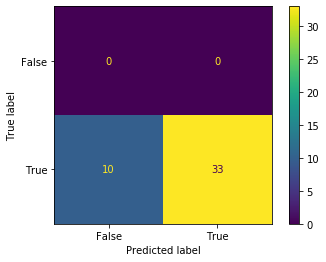

In [37]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, dataset_revision[['Pred_class', 'probabilidade']], dataset_revision['y'])

In [38]:
print(classification_report(dataset_revision['y'], clf.predict(dataset_revision[['Pred_class', 'probabilidade']])))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         0
        True       1.00      0.77      0.87        43

    accuracy                           0.77        43
   macro avg       0.50      0.38      0.43        43
weighted avg       1.00      0.77      0.87        43



C:\Users\muril\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Como apresentado anteriormente, a métrica precision é tendenciada e dar maior relevância para erros do tipo Falso Positivo. E, como os dados com status 'revision' não apresentaram nenhum exemplo em que Pred_class estivesse errada, este tipo de erro não ocorreu. Com isso, a precisão de acertos do modelo foi de 100%.

Por outro lado, a métrica recall, que considera erros do tipo Falso Negativo, levou em consideração os 10 erros cometido pelo modelo e ficou em 77%.

Por fim, como o F1 score leva em consideração tanto a precisão quanto o recall, ficou em 87%. Um "meio-termo" entre as outras duas métricas.